In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


In [3]:
#sys.path.append("../..")
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

from testing.test_utils import load_test_output_pn


In [4]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
############# define plotting params #############
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"}

In [6]:
############# define run locations #############
mp_locs = ['/home/jtindall/weight_decay/weight_decay_run_1/outputs',
           '/home/jtindall/weight_decay/weight_decay_run_2/outputs'
          ]

mp_titles = ['Single GPU With Weight Loss Run 1',
             'Single GPU With Weight Loss Run 2'
        ]

new_locs = ['/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_1/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_2/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_3/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_4/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_5/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_6/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_7/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_8/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_9/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_10/outputs'
           ]

new_titles = ['Pre-MP Framework Single GPU Run 1',
              'Pre-MP Framework Single GPU Run 2',
              'Pre-MP Framework Single GPU Run 3',
              'Pre-MP Framework Single GPU Run 4',
              'Pre-MP Framework Single GPU Run 5',
              'Pre-MP Framework Single GPU Run 6',
              'Pre-MP Framework Single GPU Run 7',
              'Pre-MP Framework Single GPU Run 8',
              'Pre-MP Framework Single GPU Run 9',
              'Pre-MP Framework Single GPU Run 10',
             ]

"""
new_linecolor = [c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],c[9]]
new_linestyle = ['--','--','--','--','--','--','--','--','--','--']

old_linecolor = [c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7]]
old_linestyle = [':',':',':',':',':',':',':',':']
"""

mp_linecolor = [c[0] for _ in mp_locs]
mp_linestyle = ['--' for _ in mp_locs]

new_linecolor = [c[1] for _ in new_locs]
new_linestyle = [':' for _ in new_locs]

locs = mp_locs + new_locs
titles = mp_titles + new_titles
linecolor = mp_linecolor + new_linecolor
linestyle = mp_linestyle + new_linestyle


i:  0
Found training logs:  ['/home/jtindall/weight_decay/weight_decay_run_1/outputs/log_train_0.csv']
i:  1
Found training logs:  ['/home/jtindall/weight_decay/weight_decay_run_2/outputs/log_train_0.csv']


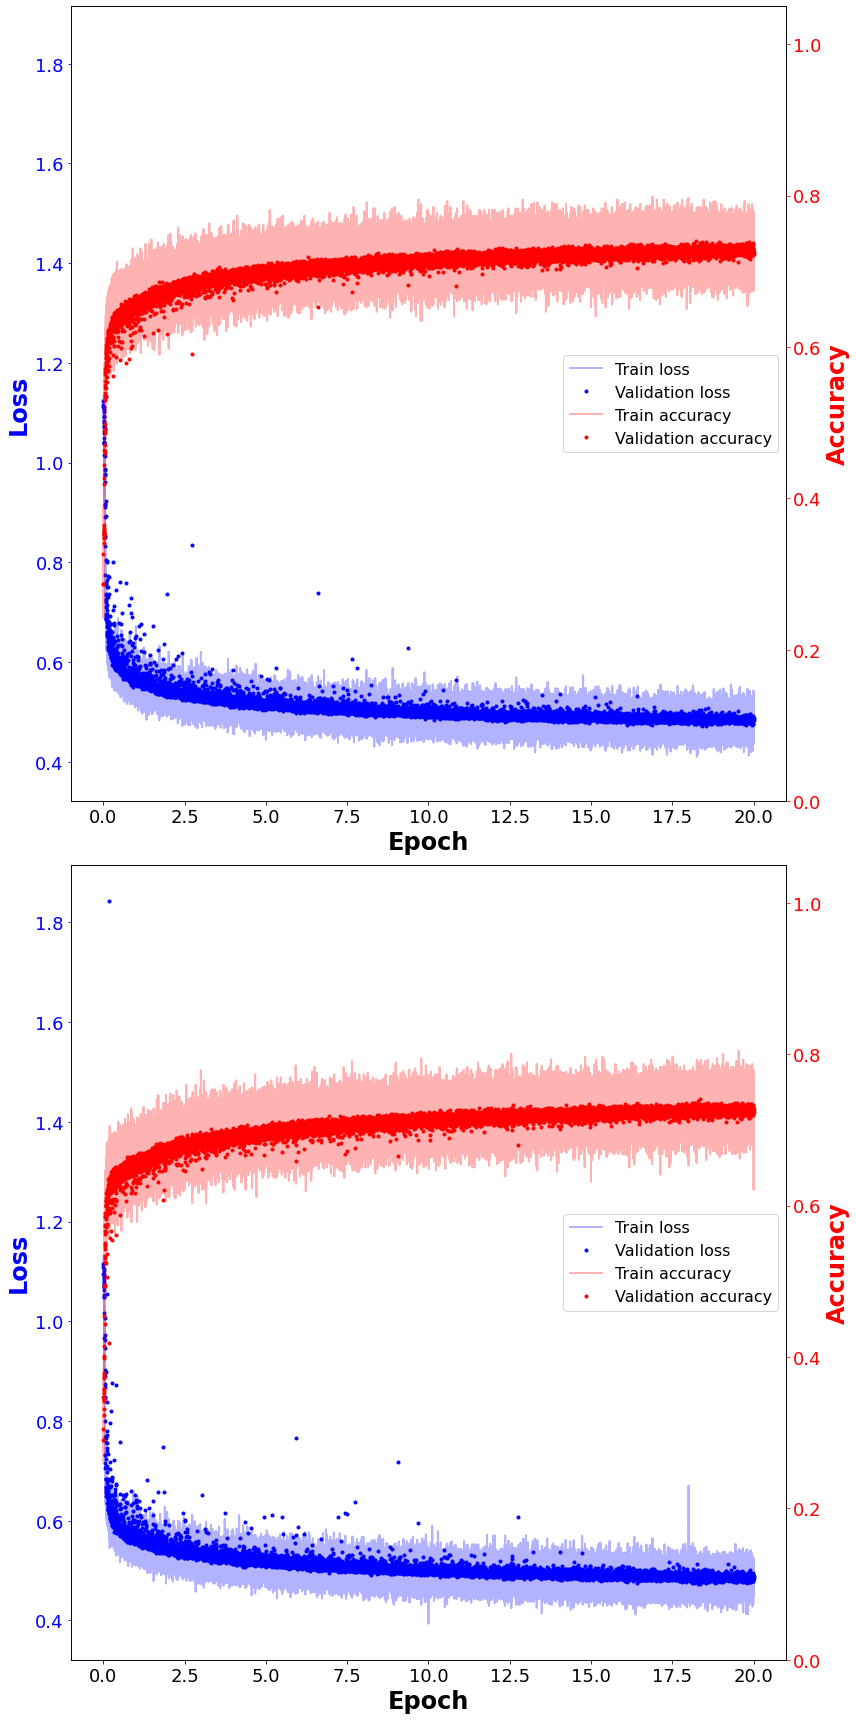

In [7]:
fig = multi_disp_learn_hist(mp_locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=20)

In [9]:
#fig = multi_disp_learn_hist(new_locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=20)

In [10]:
############# load new run data #############
idx_file_path = '/fast_scratch/WatChMaL/data/IWCD_fulltank_300_post_veto_nomichel_pe_idxs.npz'
indices = np.load(idx_file_path)['test_idxs']

cut_path = '/home/jtindall/indices/pointnet_cut_indices.npz'

cuts_to_apply= ['fq_failed', 'fq_flag']

#mp_raw_predicted_labels = [np.load(loc + "/predictions.npy") for loc in mp_locs]
mp_raw_output_softmax   = [np.load(loc + "/softmax.npy") for loc in mp_locs]
mp_raw_actual_labels    = [np.load(loc + "/labels.npy") for loc in mp_locs]

In [ ]:
############# load old run data #############

new_outputs = [load_test_output_pn(os.path.join(loc,'test_validation_iteration_dump.npz'),
                                   cut_path,
                                   np.load(idx_file_path)['test_idxs'], cut_list=[])
               for i, loc in enumerate(new_locs)]

new_raw_output_softmax   = [output["softmax"] for output in new_outputs]
new_raw_actual_labels    = [output["labels"] for output in new_outputs]
#new_raw_predicted_labels = [output["predictions"] for output in new_outputs]

data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)


In [ ]:
############# combine run data #############
#raw_predicted_labels = mp_raw_predicted_labels + new_raw_predicted_labels
raw_output_softmax   = mp_raw_output_softmax + new_raw_output_softmax
raw_actual_labels    = mp_raw_actual_labels + new_raw_actual_labels

In [ ]:
############# apply cuts to data #############
#predicted_labels = multi_get_masked_data(raw_predicted_labels, cut_path, indices, cuts_to_apply)
output_softmax   = multi_get_masked_data(raw_output_softmax, cut_path, indices, cuts_to_apply)
actual_labels    = multi_get_masked_data(raw_actual_labels, cut_path, indices, cuts_to_apply)

In [ ]:
############# plot multi e/gamma ROC #############
fprs, tprs, thrs = multi_compute_roc(output_softmax, actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\gamma$"])

In [ ]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], xlims=[[0.2,1.0]],ylims=[[1e0,2e1]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

In [ ]:
############# plot multi e/mu ROC #############
fprs, tprs, thrs = multi_compute_roc(output_softmax, actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\mu$"])

In [ ]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\mu$", fig_list=[1], 
                      linestyles=linestyle,linecolors=linecolor, show=False)

In [ ]:
############# plot collapsed ROC #############
"""
plot_list=["$e$", "$\gamma$"]
vs_list=["$\mu$"]
"""
collapsed_class_scores_list, collapsed_class_labels_list = multi_collapse_test_output(output_softmax, actual_labels, label_dict, ignore_type='$\gamma$')

collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in collapsed_class_labels_list]
collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in collapsed_class_scores_list]

In [ ]:
muon_softmax_index_dict = {"e/gamma":0, "mu":1}

fpr_list, tpr_list, thr_list = multi_compute_roc(collapsed_class_scores_list, collapsed_class_labels_list, 
                            true_label=muon_softmax_index_dict["e/gamma"], 
                            false_label=muon_softmax_index_dict["mu"])

figs = multi_plot_roc(fpr_list, tpr_list, thr_list,"e/gamma", "mu", 
                      fig_list=[1], xlims=[[0.9,1.0]],ylims=[[1e1,5e3]], 
                      linestyles=linestyle,linecolors=linecolor, plot_labels=titles, show=False)

In [ ]:
# Compute stddev
from statistics import stdev

sample_efficiencies = [0.90, 0.94, 0.98]
def compute_stdevs(test_tpr_list, test_fpr_list, N, symbol):
    rejections_list = [1.0/(fpr+1e-10) for fpr in test_fpr_list]

    compute_indices_list = np.array([[np.argmin(abs(tpr - value)) for value in sample_efficiencies] for tpr in test_tpr_list])
    #print(compute_indices_list)

    test_sample_efficiencies = np.array([tpr[compute_indices] for tpr, compute_indices in zip(test_tpr_list, compute_indices_list)])
    #print(test_sample_efficiencies)

    rejections = np.array([rejections[compute_indices] for rejections, compute_indices in zip(rejections_list, compute_indices_list)])
    #print(rejections)

    stdevs  = [stdev(rejections[:, i]) for i in range(rejections.shape[1])]
    d_stdevs = [std / np.sqrt(2*N) for std in stdevs]
    #print(stdevs)

    for std, sample_efficiency, d_stdev in zip(stdevs, sample_efficiencies, d_stdevs):
        print("sample efficiency: ", sample_efficiency , " σ: ", std, " σ/sqrt(2{}): ".format(symbol), d_stdev)
    
    return stdevs, d_stdevs


In [ ]:
#compute_stdevs(tpr_list, fpr_list, N = len(locs))

In [ ]:
cap = len(mp_locs)
print("There are ", cap, "MP runs")
print("\n MP runs:")
sigma_mp, d_sigma_mp = compute_stdevs(tpr_list[:cap], fpr_list[:cap], N = len(mp_locs), symbol="N")

print("\npre-MP runs:")
sigma, d_sigma = compute_stdevs(tpr_list[cap:], fpr_list[cap:], N = len(new_locs), symbol="N")

In [ ]:
for sample_efficiency, std_1, d_stdev_1, std_2, d_stdev_2, in zip(sample_efficiencies, sigma_mp, d_sigma_mp, sigma, d_sigma):
        diff = std_2 - std_1
        sigma_diff = np.sqrt(d_stdev_1**2 + d_stdev_2**2)
        print("sample efficiency: ", sample_efficiency , " (σ - σ_MP): ", diff, " σ_(σ - σ_MP): ", sigma_diff)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8),facecolor="w")

sample_efficiencies = [0.90, 0.94, 0.98]
rejections_list = [1.0/(fpr+1e-10) for fpr in fpr_list]

compute_indices_list = np.array([[np.argmin(abs(tpr - value)) for value in sample_efficiencies] for tpr in tpr_list])
#print(compute_indices_list)

test_sample_efficiencies = np.array([tpr[compute_indices] for tpr, compute_indices in zip(tpr_list, compute_indices_list)])
#print(test_sample_efficiencies)

rejections = np.array([rejections[compute_indices] for rejections, compute_indices in zip(rejections_list, compute_indices_list)])
#print(rejections)

for i in range(len(rejections)):
    ax.scatter(np.array(sample_efficiencies), rejections[i], color=linecolor[i])
ax.set_yscale('log')
ax.grid(b=True, which='major', color='gray', linestyle='-')
ax.grid(b=True, which='minor', color='gray', linestyle='--')
ax.set_xlim(0.9,1.0)
ax.set_ylim(1e1,5e3)

plt.show()